# 6) ANALISIS DEL DATASET A MODELAR

> Breve análisis del dataset usado para el entrenamiento de los modelos. Este análisis esta principalmente orientado a mostrar el efecto del proceso de balanceo del set de datos.

- author: Iván Fernández Aguirre
- toc: true
- image: images/N6.png
- sticky_rank: 6

In [1]:
#hide
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#hide
import nbimporter
import importlib

La mayoria de las funciones utilizadas en este projecto están en el modulo:

In [3]:
import Functions_for_FMP as fffmp

In [4]:
#hide
importlib.reload(fffmp)
import Functions_for_FMP as fffmp

In [5]:
#hide
import seaborn as sns
sns.set_theme()

## CARGA DE DATOS

Empezamos, como siempre, cargando los datos. Pero, en esta oportunidad, cargaremos tres datasets para compararlos:

   1) 'FMP_final' (FMP_org): El *dataset* generado en el bloque 3. Con las variables finales.
    
   2) 'FMP_Balance_V_vs_D' (FMP_bal_VvsD): El *dataset* donde balanceamos victorias y derrotas a través de agregar una variable de localía e intercambiar locales y visitantes.
    
   3) 'FMP_training_bal_tot' (FMP_bal_tot): El *dataset* utilizado en el modelo, donde balanceamos todos las clases a través de un *undersampling* y *oversampling*

In [6]:
data='FMP_final'
FMP_org = pd.read_pickle(data)

In [7]:
data='FMP_Balance_V_vs_D'
FMP_bal_VvsD = pd.read_pickle(data)

In [8]:
data='FMP_training_bal_tot'
FMP_bal_tot = pd.read_pickle(data)

## COMPARACIONES

La idea principal de este último bloque fue mirar como lucía nuestro set de datos después del proceso de balanceo de las clases de *targets*. Para ello analizaremos brevemente la distribución de resultados bajo algunas condiciones para los tres *Dataframes*.

### 1) Distribución de Resultados

Empecemos por lo más básico, la distribución de resultados para cada uno:

**Original:**

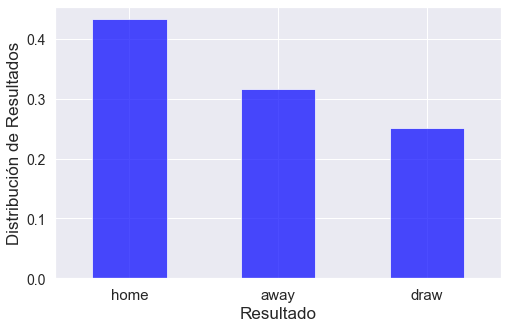

In [9]:
#collapse-hide
variable='target'
x_label='Resultado'
fffmp.Histograma_VAR_categorica(FMP_org,variable,x_label)

**Balance Derrotas-Victorias:**

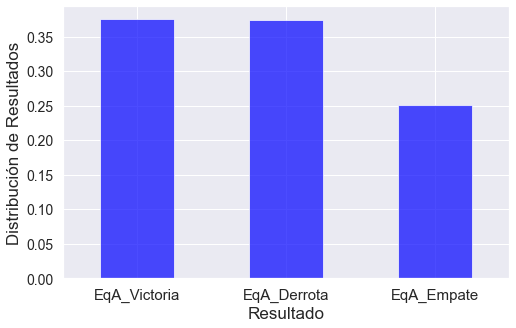

In [10]:
#collapse-hide
variable='target'
x_label='Resultado'
fffmp.Histograma_VAR_categorica(FMP_bal_VvsD,variable,x_label)

**Balance Total:**

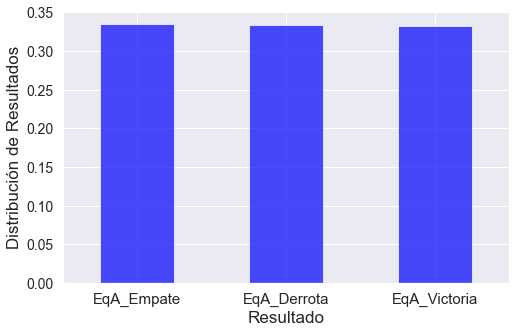

In [11]:
#collapse-hide
variable='target'
x_label='Resultado'
fffmp.Histograma_VAR_categorica(FMP_bal_tot,variable,x_label)

Efectivamente, cumplimos nuestro objetivo de balancear los posibles resultados.

### **2) Localía**

Tal como se explicó en el bloque 5), el balanceo de victorias y derrotas no implicaba una alteración de la información del *dataset*, solo un reordenamiento de la misma. Luego, deberíamos recuperar la información al tener en cuenta el *feature* de localía:

**Original:**

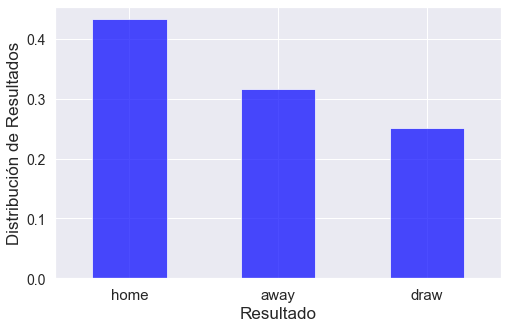

In [12]:
#collapse-hide
variable='target'
x_label='Resultado'
fffmp.Histograma_VAR_categorica(FMP_org,variable,x_label)

**Balance Derrotas-Victorias:**

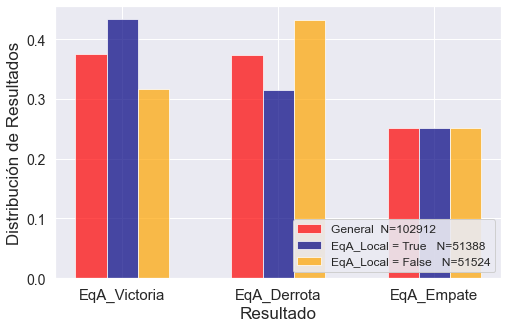

In [13]:
#collapse-hide
variable='target'
variable_condicional='EqA_Local'
condicion_numerica=0
x_label='Resultado'
tipo_de_condición='bool'
fffmp.Histograma_condicional_numerica(FMP_bal_VvsD,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label,'lower right')

Tal como vemos,una vez considerada la localía, recuperamos la misma distribución:
* Local $\approx43\%$ de probabilidades de ganar
* Visitante $\approx32\%$ de probabilidades de ganar
* Empate $\approx25\%$ de probabilidades de ganar

Esto obviamente se ve alterado en el último paso, tal como se ve aqui abajo:

**Balance Total:**

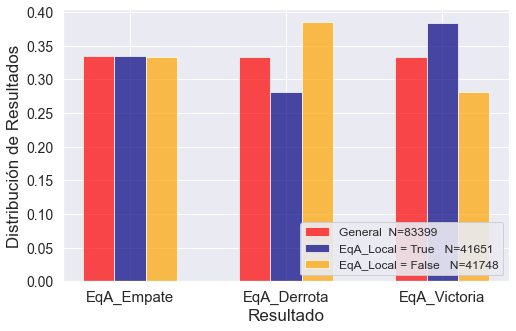

In [14]:
#collapse-hide
variable='target'
variable_condicional='EqA_Local'
condicion_numerica=0
x_label='Resultado'
tipo_de_condición='bool'
fffmp.Histograma_condicional_numerica(FMP_bal_tot,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label,'lower right')

¿Quiere esto decir que alteramos la información de nuestro set de datos? En realidad no, solamente cambiamos la distribución de ocurrencias de los resultados en nuestro dataset. Y aquí es donde se ve claramente que estos valores no son (al menos necesariamente) probabilidades reales. 

Si miramos a como se altera esta distribución en función de la localía, veremos que la misma información esta allí:
* En los *datasets* anteriores la cantidad de victorias locales era de $\approx43\%$ contra un $\approx32\%$ de los visitantes. Lo que implica que una victoria local es $\approx 1.35$ veces más probable.
* En este dataset  la cantidad de victorias locales es de $\approx38\%$ contra un $\approx28\%$ de los visitantes. Lo que implica que, nuevamente, una victoria local es $\approx 1.35$ veces más probable.

Esto muestra que no estamos perdiendo (al menos a este nivel), ninguna información al transformar y balancear nuestro set de datos. Más aún. permite ver esa sutil diferencia entre la distribución de *outcomes* y la probabilidad. Por esa razon, a la hora de analizar el problema, creo que siempre es más seguro mirar como se altera la distribución de *outcomes* en función de los distintos parámetros en juego, en lugar de los valores absolutos de esa distribución.

## CURIOSIDADES

Aprovechemos entonces para ver unas curiosidades con el dataset final (totalmente balanceado).

### 1) ¿Debería apostar por un equipo que ganó sus últimos 10 partidos? 

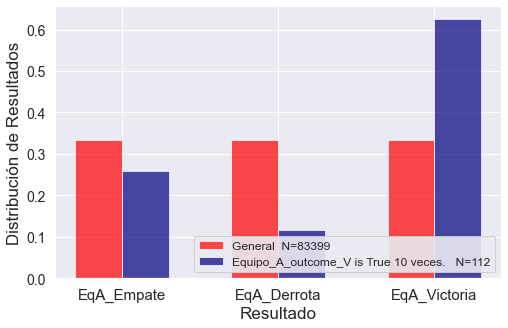

In [15]:
#collapse-hide
variable='target'
variable_condicional='Equipo_A_outcome_V'
x_label='Resultado'
n=10
fffmp.Histograma_historic_condition_n_times(FMP_bal_tot,variable,variable_condicional,n,x_label,legend_pos='lower right')

Sí. Las probabilidades de que gane van a ser cerca de dos veces mayores que la media.

### 2) ¿Que pasa si su oponente gano al menos 7 de sus últimos 10? 

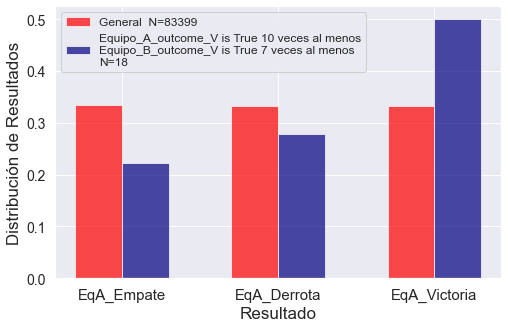

In [16]:
#collapse-hide
variable='target'
variable_condicional_1='Equipo_A_outcome_V'
n1=10
variable_condicional_2='Equipo_B_outcome_V'
n2=7
x_label='Resultado'
tipo='both >='

fffmp.Histograma_historic_2_condition_n_times(FMP_bal_tot,variable,tipo,variable_condicional_1,n1,variable_condicional_2,n2,x_label,legend_pos='best')

Bueno, no tenemos muchos casos, pero las chances de que gane son $1.5$ veces mayores.

### 3) ¿Y si el rival ganó como máximo 3 de sus últimos 10? 

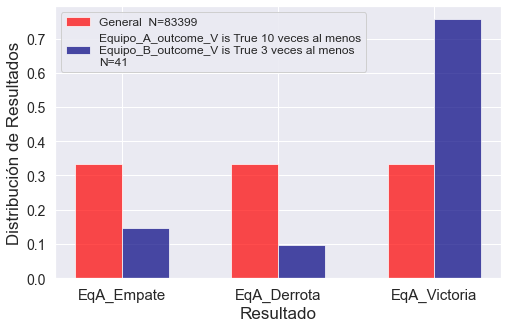

In [17]:
#collapse-hide
variable='target'
variable_condicional_1='Equipo_A_outcome_V'
n1=10
variable_condicional_2='Equipo_B_outcome_V'
n2=3
x_label='Resultado'
tipo='1 >= 2 <='

fffmp.Histograma_historic_2_condition_n_times(FMP_bal_tot,variable,tipo,variable_condicional_1,n1,variable_condicional_2,n2,x_label,legend_pos='best')

Definitivamente hazlo, tus chances se incrementan en un $\approx 2.25$!

Lo dejaremos aquí por ahora.